# The Coffee Shop Mystery: A Tale of Sales, Weather, and Statistics Gone Wild
![Anime Scene 1](anime/A_anim/main.png)



## Meet Our Heroes

Meet Max, proud owner of *Café Chaos* (and yes, lately that name has been a bit too accurate). The café was doing great until... well, let Max tell you:

"I used to have this down to a science!" Max gestures wildly at the empty tables, nearly knocking over a stack of unused cups. "Cold day? Packed house. Social media post goes viral? Line out the door. But now? It's like my café is playing by some bizarro-universe rules!"

Max's barista, Jazz, rolls his eyes while crafting a perfect rosetta in a customer's latte. "Maybe Mercury's in retrograde?"

Enter Mira, Max's data-savvy friend, who happens to be enjoying her morning espresso. She pauses mid-sip, a gleam in her eye. "Or maybe," she says, pulling out her laptop, "we're looking at this all wrong. You don't need astrology - you need analytics!"

## The Investigation Begins

In [4]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add the src directory to path for imports
src_dir = os.path.join(os.path.dirname(os.getcwd()), 'src')
sys.path.append(src_dir)

from data_generator import DataGenerator


# Set up plotting style
sns.set_style("whitegrid")

## The Data Detective's Plan

"Here's what we'll do," Mira explains, fingers flying over her keyboard. "We'll analyze 200 days of data tracking:
- Daily sales (the mystery we need to solve)
- Weather patterns (because apparently Mother Nature's playing tricks)
- Social media activity (those TikTok barista videos aren't helping like they used to)
- Foot traffic (all those people walking by but not coming in... suspicious!)

And just between us," she adds with a conspiratorial whisper, "we'll keep an eye on something Max hasn't been tracking..."

Jazz leans in, intrigued. "What's that?"

"Competitor activity," Mira winks. "Sometimes the real story isn't in what you see, but in what you don't see."

In [5]:
# Time to generate some caffeinated data!
generator = DataGenerator(seed=42)  # Because 42 is always the answer

# Generate 200 days of café drama
data = generator.generate_data(n_days=200, include_hidden=True)

print("Generated data shape:", data.shape)
print("\nColumns:", data.columns.tolist())
print("\nFirst few days of mystery data:")
data.head()

Generated data shape: (200, 5)

Columns: ['Weather', 'Foot_Traffic', 'Social_Media', 'Sales', 'Competitor']

First few days of mystery data:


,Weather,Foot_Traffic,Social_Media,Sales,Competitor
0,1,-29.912795,6,0.000000,1.0
1,0,53.562236,2,22.791622,0.0
2,0,99.443134,7,72.889697,0.0
3,1,101.421608,6,71.968807,0.0
4,1,19.203083,5,0.000000,1.0


## First Clues Emerge

Looking at the first few days of data, Mira raises an eyebrow. "Well, well, well... what do we have here?"

Max squints at the numbers. "What? What do you see?"

"Let's make it more visual," Mira says. "Sometimes patterns pop out when you see the bigger picture - kind of like how you spot a heart in latte art!"

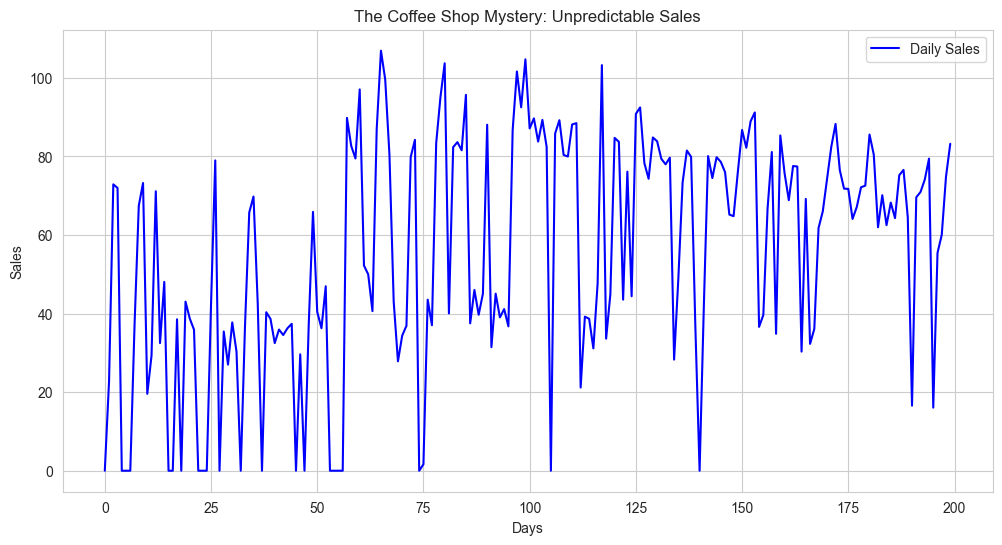

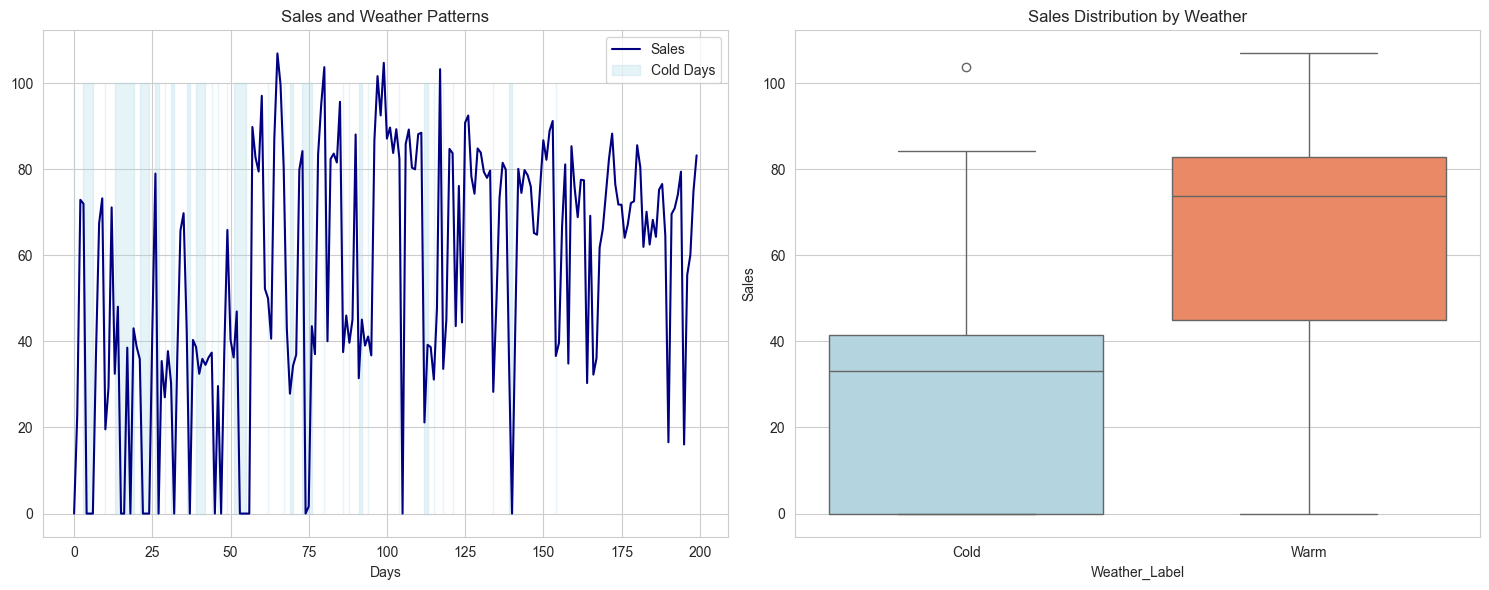

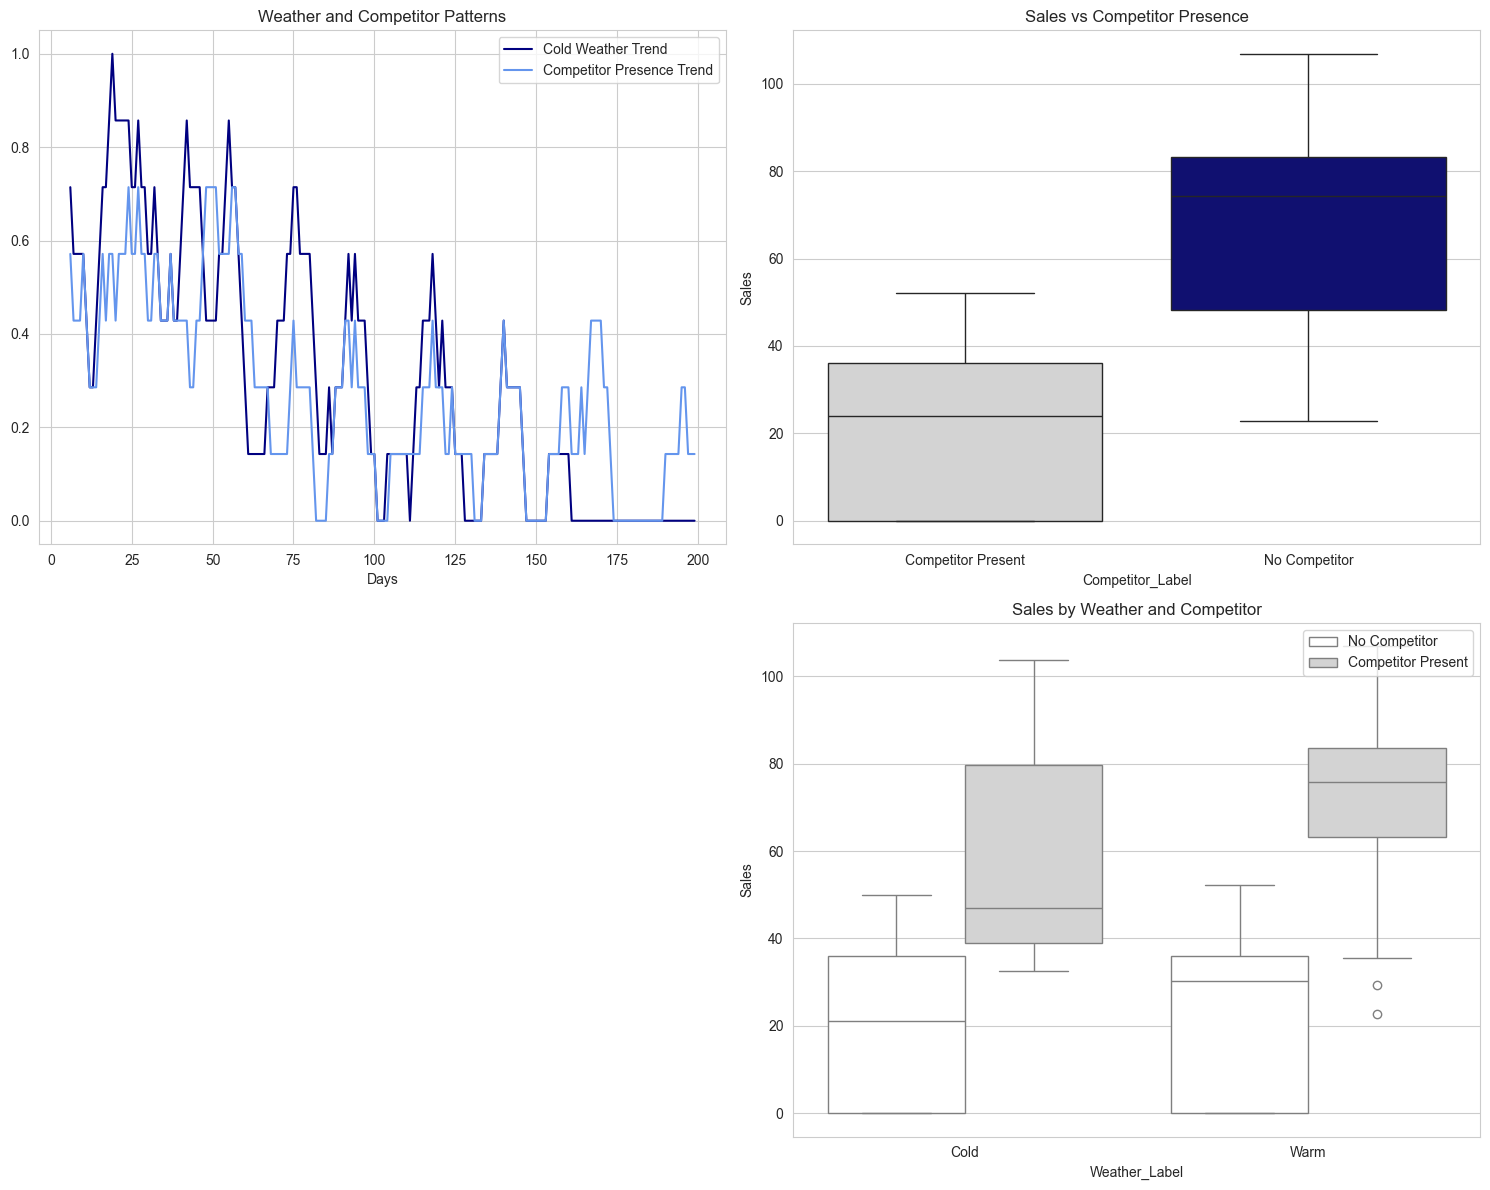

In [15]:
class CausalVisualizer:
    def plot_synthetic_story(self, data):
        """Create plots for telling the data story."""
        
        # Plot 1: Daily Sales Pattern
        plt.figure(figsize=(12, 6))
        plt.plot(range(len(data)), data['Sales'], color='blue', label='Daily Sales')
        plt.title('The Coffee Shop Mystery: Unpredictable Sales')
        plt.xlabel('Days')
        plt.ylabel('Sales')
        plt.legend()
        plt.show()
        
        # Plot 2: Weather and Sales
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Time series with weather overlay
        ax1.plot(range(len(data)), data['Sales'], color='navy', label='Sales')
        ax1.fill_between(range(len(data)), 0, 100, 
                        where=data['Weather']==1,
                        color='lightblue', alpha=0.3,
                        label='Cold Days')
        ax1.set_title('Sales and Weather Patterns')
        ax1.set_xlabel('Days')
        ax1.legend()
        
        # Create weather labels
        data['Weather_Label'] = data['Weather'].map({0: 'Warm', 1: 'Cold'})
        
        # Box plot by weather - fixed warning by using hue
        sns.boxplot(data=data, x='Weather_Label', y='Sales', 
                   hue='Weather_Label',
                   ax=ax2,
                   palette={'Warm': 'coral', 'Cold': 'lightblue'},
                   legend=False)
        ax2.set_title('Sales Distribution by Weather')
        plt.tight_layout()
        plt.show()
        
        # Plot 3: Competitor Analysis
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
        
        # Weather and Competitor Trends
        ax1.plot(range(len(data)), data['Weather'].rolling(7).mean(), 
                label='Cold Weather Trend', color='navy')
        ax1.plot(range(len(data)), data['Competitor'].rolling(7).mean(), 
                label='Competitor Presence Trend', color='cornflowerblue')
        ax1.set_title('Weather and Competitor Patterns')
        ax1.set_xlabel('Days')
        ax1.legend()
        
        # Create competitor labels
        data['Competitor_Label'] = data['Competitor'].map(
            {0: 'No Competitor', 1: 'Competitor Present'})
        
        # Sales by Competitor - fixed warning by using hue
        sns.boxplot(data=data, x='Competitor_Label', y='Sales', 
                   hue='Competitor_Label',
                   ax=ax2,
                   palette={'No Competitor': 'navy', 'Competitor Present': 'lightgray'},
                   legend=False)
        ax2.set_title('Sales vs Competitor Presence')
        
        # Sales by Weather and Competitor combined
        g = sns.boxplot(data=data, x='Weather_Label', y='Sales', 
                       hue='Competitor_Label',
                       ax=ax4, 
                       palette=['white', 'lightgray'])
        ax4.set_title('Sales by Weather and Competitor')
        
        # Properly handling the legend
        handles, labels = ax4.get_legend_handles_labels()
        ax4.legend(handles, ['No Competitor', 'Competitor Present'], 
                  title='', loc='upper right')
        
        ax3.remove()  # Remove unused subplot
        plt.tight_layout()
        plt.show()

# Generate Plots
visualizer = CausalVisualizer()
story_plots = visualizer.plot_synthetic_story(data)

## The Plot Thickens

Mira leans forward, gesturing at her laptop screen.  
*"Alright coffee squad, let's decode what your data is telling us."*

*"First, look at your daily sales,"* she points to the zigzagging blue line.  
*"It's like watching a heart monitor during a caffeine rush - up to 100 on your best days, dropping to zero on others."*

*"Those zeros are when we had to close,"* Max winces.  
*"But what's with all those spikes and dips?"*

*"Ah, that's where it gets interesting!"* Mira switches to the weather overlay.  
*"See these light blue bands? Those are your cold days. And look how your sales drop during them - from around 75 units on warm days down to about 35 on cold ones."*

Jazz peers at the trend lines.  
*"But what's really wild is this competitor pattern. Look how it follows the cold weather!"*

*"Exactly!"* Mira exclaims.  
*"They're not just randomly showing up. They're strategically more active during cold spells - see how those blue lines track each other? But here's the real kicker..."*

She points to the bottom boxplot.  
*"When you have no competitor, your sales are strong - averaging around 80 units. With them? You're lucky to hit 25. But it gets even more interesting when we combine weather and competition..."*

*"Those four boxes,"* Max leans in, genuinely intrigued.  
*"They tell the whole story, don't they?"*

*"Your best scenario: warm weather, no competitor - you're hitting 75-80 units consistently. Your worst: cold weather with competitor - struggling to reach 20 units. But notice something? Even in cold weather, you do okay if the competitor's not around."*

*"So it's not just the weather?"* Jazz asks, forgetting about the latte they're supposed to be making.

*"Nope! Weather is just part of the puzzle. These patterns suggest there's something deeper going on. The kind of thing that simple averages won't catch..."*

*"Let me guess,"* Max sighs, though there's a glint of excitement in their eyes.  
*"Time for fancier analysis?"*

*"Oh yes,"* Mira grins.  
*"These patterns are just the appetizer. Wait until you see what regression analysis tells us about your sales recipe!"*

---

### To be continued in **Part B: First Step into Statistical Analysis...**  
*(Will our heroes uncover the true recipe behind Café Chaos's sales? Can statistical tools match the precision of a perfectly calibrated espresso machine? And will Jazz ever admit that data might be as interesting as latte art? Stay tuned...)*
